# Analyze parameters on Autonomous communities

Analyzes the parameters with their results compared to whole Spain and separeted by CCAA.

In [1]:
import csv
import json
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

PARAMETER_COLUMNS = ['P', 'beta', 'scale_beta', 't_inc', 'scale_ea', 't_i', 'delta', 'phi', 'scale_s']
final_parameters_folder = '../final_parameters'
first_date = '2020-02-09'
last_date = '2020-04-14'
start_date = datetime.strptime(first_date, "%Y-%m-%d")
end_date = datetime.strptime(last_date, "%Y-%m-%d")
num_days = (end_date-start_date).days + 1
datelist = pd.date_range(start_date, periods=num_days).tolist()
N_CCAA = 19

### 1. Load real covid data from the files.

Get the prevalence curves per CCAA per day in the simulation period:

- Pr: Real prevalence
- CCAAs: Array with the province names

In [2]:
COLUMN_FOR_FITTING_REAL_DATA = 'total_cases'
REAL_DATA_PATH = f'{final_parameters_folder}/data/real_covid_data.csv'

# Filter for simulation period
real_df = pd.read_csv(REAL_DATA_PATH)
real_df = real_df[real_df['date'] >= first_date]
real_df = real_df[real_df['date'] <= last_date]

# Convert to matrix (ncca x num_days; value=total_cases)
Pr = real_df[['id', 'date', COLUMN_FOR_FITTING_REAL_DATA]].sort_values(['id', 'date']).set_index(
    ['id', 'date']
).unstack().values
CCAAs = [eval(x)["name"] for x in real_df.sort_values(['date', 'id'])[:N_CCAA]['c'].values]
print("Real prevalence shape: ", Pr.shape)
print("CCAAs shape: ", len(CCAAs))

Real prevalence shape:  (19, 66)
CCAAs shape:  19


### 2. Load parameters with simulation results

Get the simulation results as well as the parameters used in the simulations:

- Ps: Simulated prevalence
- df: Parameters dataframe

Only the first hundred paremeters will be taken into account.


In [3]:
# Parameters
parameters_path = f"{final_parameters_folder}/data/params.csv"
params_df = pd.read_csv(parameters_path)[:100]
print("Params df shape: ", params_df.shape)

# Simulation curves
prevalence_path = f"{final_parameters_folder}/output/prevalence.npy"
Ps = np.load(prevalence_path)[:, :, :100]
print("Simulate prevalence shape: ", Ps.shape)

Params df shape:  (100, 10)
Simulate prevalence shape:  (19, 66, 100)


### 3. Plot the parameter set prevalence for whole Spain

Compare how the parameters work for the Spain curve.

Ps_a shape:  (66, 100)
Pr_a shape:  (66, 100)


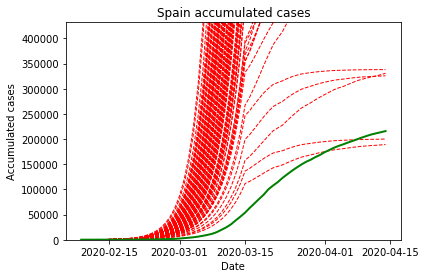

In [5]:
# Compose the accumulated prevalence for all the CCSS
Ps_a = Ps.sum(axis=0)
Pr_a = Pr.sum(axis=0)
print("Ps_a shape: ", Ps_a.shape)
print("Pr_a shape: ", Ps_a.shape)

# Plot simulated curves
for i in range(len(params_df.values)):
    plt.plot(datelist, Ps_a[:, i], "--r", linewidth=1)

# Plot real curve
plt.plot(datelist, Pr_a, color='green', linewidth=2)

plt.title("Spain accumulated cases")
plt.xlabel("Date")
plt.ylabel("Accumulated cases")
plt.ylim(0, 2*max(Pr_a))
plt.show()

### 5. Compare the curves for each CCAA

Plot in a plotly grid the curves for each CCAA

Ps shape:  (19, 66, 100)
Pr shape:  (19, 66)


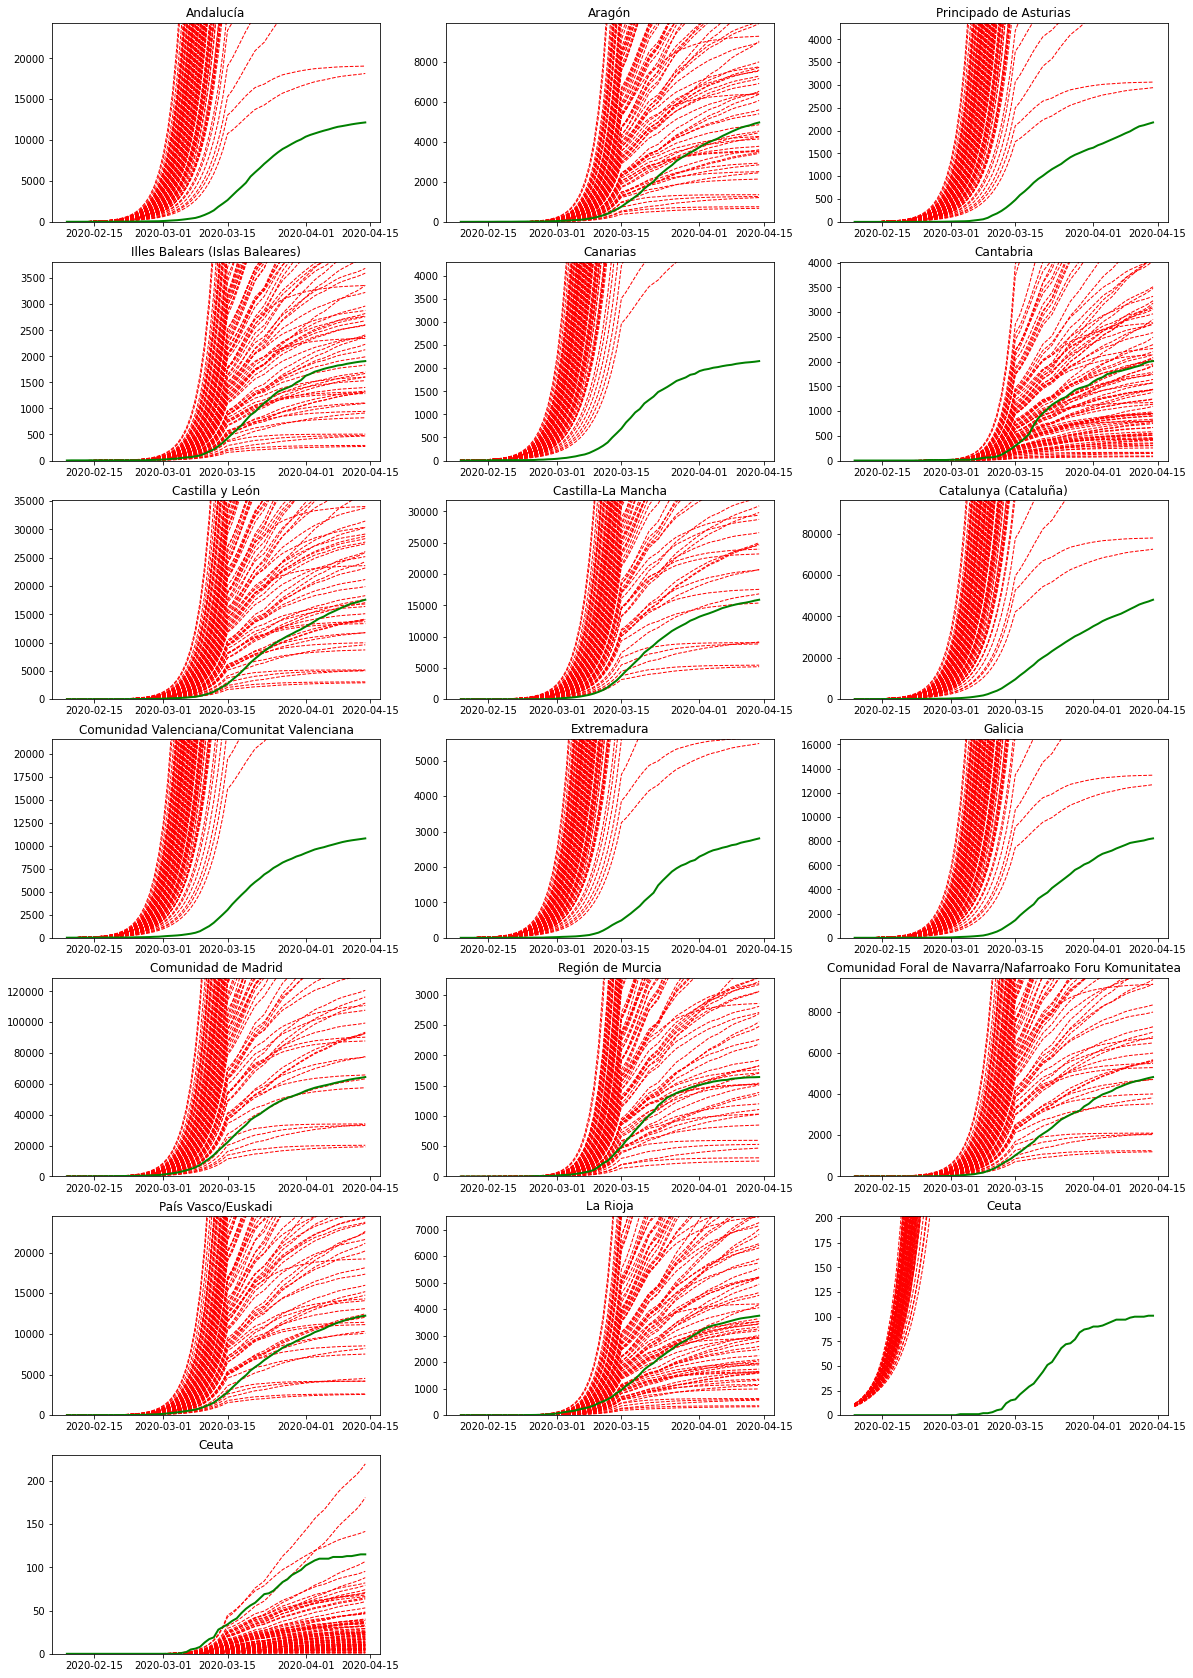

In [15]:
# Plot simulated curves
print("Ps shape: ", Ps.shape)
print("Pr shape: ", Pr.shape)

plt.figure(figsize=(20, 30))
plt.xlabel("Date")
plt.ylabel("Accumulated cases")
for i, CCAA in enumerate(CCAAs):
    # Simulated curves for the CCAA
    axis = plt.subplot(7, 3, i+1)
    axis.set_title(CCAA)
    for param in range(len(params_df.values)):
        axis.plot(datelist, Ps[i, :, param], "--r", linewidth=1)
    
    # Real curve for the CCAA
    axis.set_ylim(0, 2*max(Pr[i]))
    axis.plot(datelist, Pr[i], color='green', linewidth=2)

plt.show()